In [188]:
##importing necessary modules
import matplotlib ##import for python plotting and viz library
import matplotlib.pyplot as plt
import rasterio ##import rasterio for reading geospatial formats
from rasterio import plot
from rasterio.plot import show, show_hist
import os ##importing os for setting working directory
import numpy as np
import shapely
import earthpy.plot as ep
from glob import glob
import scipy
from scipy.io import loadmat
from shapely import geometry ##needed for manipulating vector truth data
from shapely.geometry import shape, Point, LineString, Polygon ##needed for manipulating vector truth data
from descartes import PolygonPatch # this is a helpful library for plotting shapely shapes in matplotlib
import fiona ##for shapefile ground truth data reading and writing
import geopandas ##makes working with geospatial data in python easier
import folium ##makes it easy to visualize data that's been manipulated in python on an interactive leaflet map
from pyproj import CRS ##for lat long coordinates
from pyproj import Transformer ##for reprojecting raster files later on
from pyproj import Proj ##for reprojecting raster files later on
from shapely.geometry import mapping ##needed to transform shapefile to GeoJSON
from sklearn import svm ##importing support vector machine algorithm
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image
%matplotlib inline 

In [106]:
#checking working directory
os.getcwd()

'/Users/Dora/Documents/Data Science Ryerson/Final Capstone/git/Capstone'

In [177]:
##importing image
##adding all file paths to a list
s2_bands_path = ["/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B01.tiff", 
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B02.tiff", 
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B03.tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B04.tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B05.tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B06.tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B07.tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B08.tiff"]

##adding file path of each band separately
band1_path = ["/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B01.tiff"]
band2_path = ["/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B02.tiff"]
band3_path = ["/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B03.tiff"]
band4_path = ["/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B04.tiff"]
band5_path = ["/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B05.tiff"]
band6_path = ["/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B06.tiff"]
band7_path = ["/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B07.tiff"]
band8_path = ["/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B08.tiff"]

##adding only true colour file paths to a list
true_colour_bands_path = ["/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B02.tiff", 
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B03.tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B04.tiff"]

##open these files and add all bands to an full array
arrs = []
for band in s2_bands_path:
    with rasterio.open(band) as f:
        arrs.append(f.read(1))

##adding true colour bands to a true colour array
arrs_true_colour = []
for band in true_colour_bands_path:
    with rasterio.open(band) as f:
        arrs_true_colour.append(f.read(1))
        
##adding each band separately to array
band1_array = []
for band in band1_path:
    with rasterio.open(band) as f:
        band1_array.append(f.read(1))
        
band2_array = []
for band in band2_path:
    with rasterio.open(band) as f:
        band2_array.append(f.read(1))

band3_array = []
for band in band3_path:
    with rasterio.open(band) as f:
        band3_array.append(f.read(1))
        
band4_array = []
for band in band4_path:
    with rasterio.open(band) as f:
        band4_array.append(f.read(1))

band5_array = []
for band in band5_path:
    with rasterio.open(band) as f:
        band5_array.append(f.read(1))
        
band6_array = []
for band in band6_path:
    with rasterio.open(band) as f:
        band6_array.append(f.read(1))
        
band7_array = []
for band in band7_path:
    with rasterio.open(band) as f:
        band7_array.append(f.read(1))
        
band8_array = []
for band in band8_path:
    with rasterio.open(band) as f:
        band8_array.append(f.read(1))

##opening each band separately
band1 = rasterio.open("/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B01.tiff")
        
##convert all to numpy arrays
all_bands_img = np.array(arrs, dtype=arrs[0].dtype)
true_colour_img = np.array(arrs_true_colour, dtype=arrs_true_colour[0].dtype)
band1_final_array = np.array(band1_array, dtype=band1_array[0].dtype)
band2_final_array = np.array(band2_array, dtype=band2_array[0].dtype)
band3_final_array = np.array(band3_array, dtype=band3_array[0].dtype)
band4_final_array = np.array(band4_array, dtype=band4_array[0].dtype)
band5_final_array = np.array(band5_array, dtype=band5_array[0].dtype)
band6_final_array = np.array(band6_array, dtype=band6_array[0].dtype)
band7_final_array = np.array(band7_array, dtype=band7_array[0].dtype)
band8_final_array = np.array(band8_array, dtype=band8_array[0].dtype)

##let's check the shape of these arrays
print(all_bands_img.shape)
print(true_colour_img.shape)
print(band1_final_array.shape)

band1_final_array

##this shows up as expected, with number of bands first and x and y pixels second and third

##in the array we can see the values for each pixel
##we only see 1 value per pixel because we have the bands separated
##we are mainly seeing 255 because we're looking at the white edges of the image (see below)
##that don't have a pixel - these show up as 255, this is basically our missing data
##we are going to remove these 255 values later on when we're building the training data, for now we
##leave them in

(8, 2201, 2629)
(3, 2201, 2629)
(1, 2201, 2629)


array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

In [129]:
##different method of importing the images so I can manipulate them later on (need rasterio dataset)
# create a products directory within the data dir which won't be uploaded to Github
img_dir = '/Users/Dora/Documents/Data Science Ryerson/Final Capstone/products/'

# check to see if the dir it exists, if not, create it
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

# filepath for image we're writing out
img_fp = img_dir + 'sentinel_bands.tif'

# Read metadata of first file and assume all other bands are the same
with rasterio.open(s2_bands_path[0]) as src0:
    meta = src0.meta

# Update metadata to reflect the number of layers
meta.update(count = len(s2_bands_path))

# Read each layer and write it to stack
with rasterio.open(img_fp, 'w', **meta) as dst:
    for id, layer in enumerate(s2_bands, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))
            
full_dataset = rasterio.open(img_fp)
img_rows, img_cols = full_dataset.shape
img_bands = full_dataset.count
print(full_dataset.shape) # dimensions
print(full_dataset.count) # bands

(2201, 2629)
8


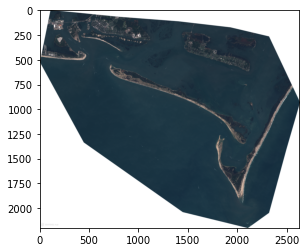

<AxesSubplot:>

In [109]:
##visualizing RGB bands
show(true_colour_img[[2,1,0], :, :])

##here we can also in white see the missing data. we will remove this later when organizing the classifier data

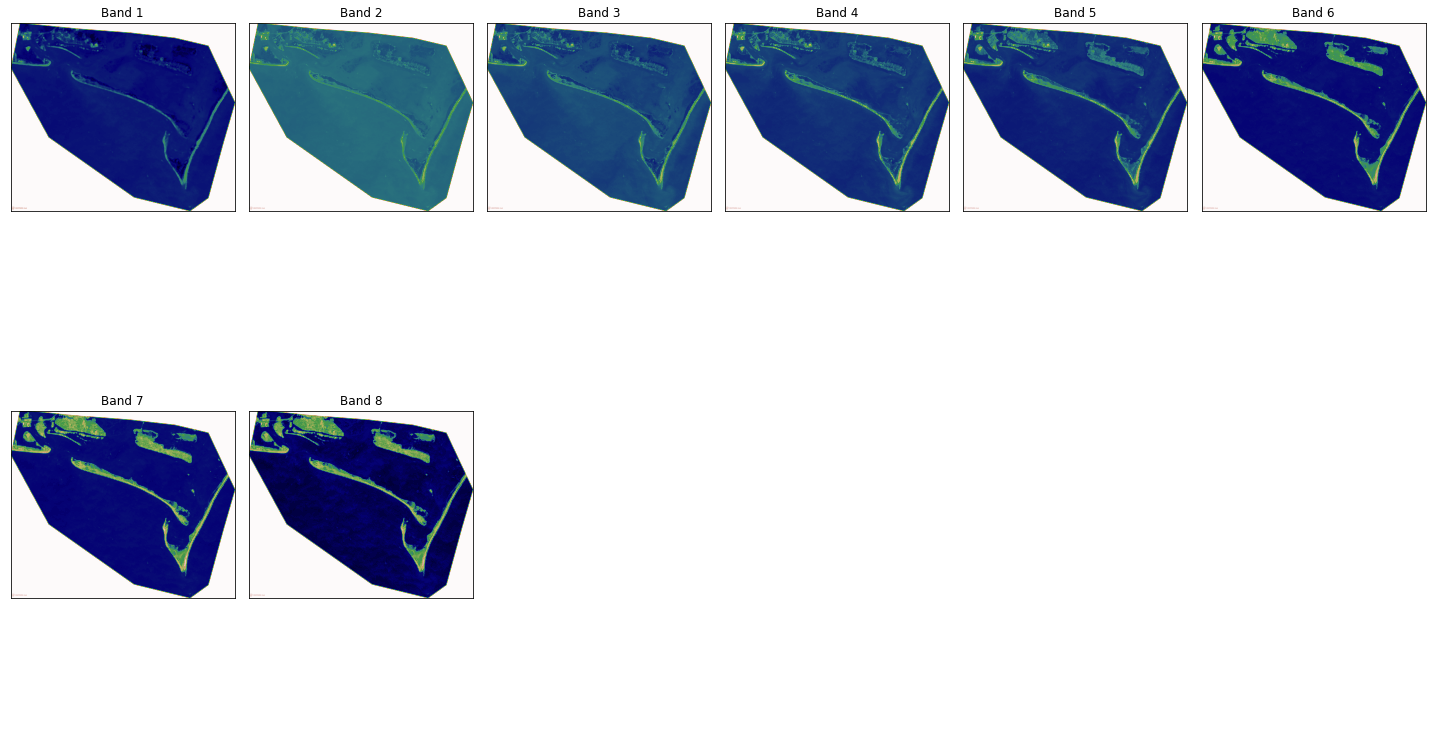

In [110]:
##using earhpy to visualize each band 
ep.plot_bands(all_bands_img,
             cmap = 'gist_earth',
             figsize = (20,12),
             cols = 6,
             cbar = False)
plt.show()

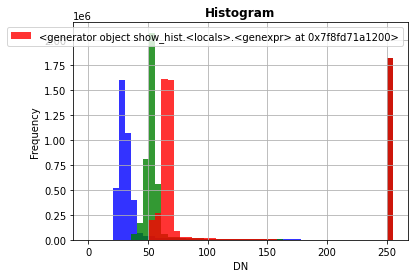

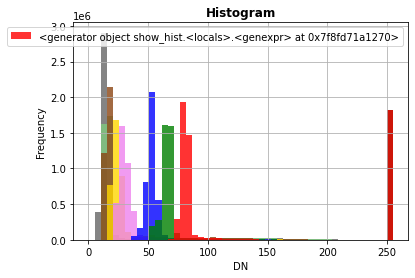

In [111]:
##visualizing histograms will help us understand the distribution of the pixels/values of the bands
##plotting histograms, method 1
rasterio.plot.show_hist(true_colour_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.8) ##true colour histogram
rasterio.plot.show_hist(all_bands_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.8) ##all bands histogram


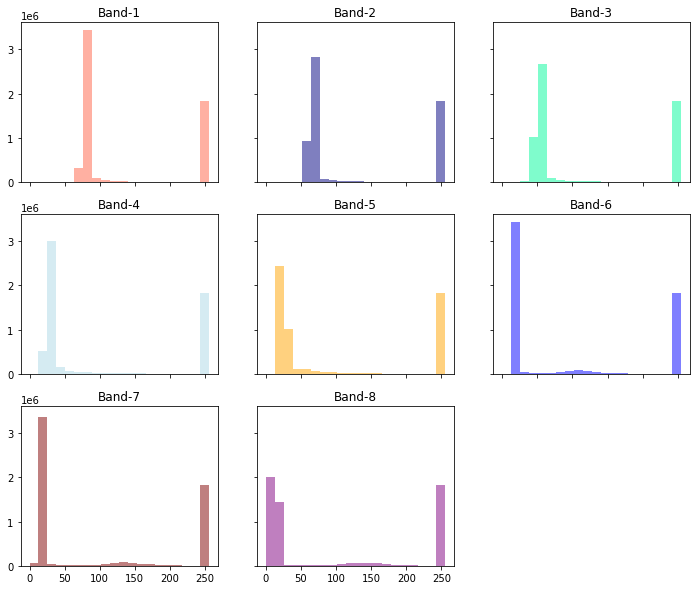

In [147]:
##plotting histograms, method 2
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(all_bands_img, 
        colors = colors,
        title=[f'Band-{i}' for i in range(1, 9)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10))

plt.show()

##for each band you see there are values within the 255 range (the bar to the right), because
##there are areas on each image that are essentially empty (the white areas around the image in the 
##visualization).  We are removing this later on when we're organizing data for classifier
##further we see that the pixel values are relatively tightly packed, meaning there is 
##likely not that much visual diversity in the image 

In [200]:
##calculating correlation between bands 
##first we need to flatten each band so we can can calculate numpy correlation
band1_flat = band1_final_array.flatten()
band2_flat = band2_final_array.flatten()
band3_flat = band3_final_array.flatten()
band4_flat = band4_final_array.flatten()
band5_flat = band5_final_array.flatten()
band6_flat = band6_final_array.flatten()
band7_flat = band7_final_array.flatten()
band8_flat = band8_final_array.flatten()

##calculating correlation matrix
corr_matrix = np.corrcoef(band1_flat, band2_flat)
corr_matrix

x = np.vstack([band1_flat, band2_flat, band3_flat, band4_flat, band5_flat, band6_flat, band7_flat, band8_flat])
corr = np.corrcoef(x)
corr

##in the correlation matrix we see that all bands are heavily correlated.. not sure yet if this is a problem

array([[1.        , 0.99861212, 0.99774596, 0.99429922, 0.99148923,
        0.97526194, 0.96276164, 0.96132633],
       [0.99861212, 1.        , 0.99951272, 0.99656255, 0.99275378,
        0.97606609, 0.963646  , 0.9624219 ],
       [0.99774596, 0.99951272, 1.        , 0.99834912, 0.99526127,
        0.9802831 , 0.96893033, 0.9676865 ],
       [0.99429922, 0.99656255, 0.99834912, 1.        , 0.99855121,
        0.98711346, 0.97786989, 0.97655551],
       [0.99148923, 0.99275378, 0.99526127, 0.99855121, 1.        ,
        0.99369012, 0.98676725, 0.98540844],
       [0.97526194, 0.97606609, 0.9802831 , 0.98711346, 0.99369012,
        1.        , 0.99859524, 0.99789708],
       [0.96276164, 0.963646  , 0.96893033, 0.97786989, 0.98676725,
        0.99859524, 1.        , 0.99947588],
       [0.96132633, 0.9624219 , 0.9676865 , 0.97655551, 0.98540844,
        0.99789708, 0.99947588, 1.        ]])

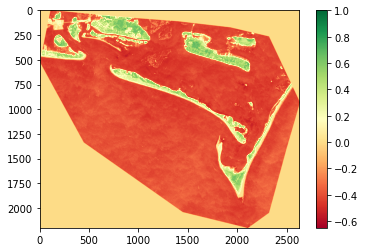

In [112]:
##calculating NVDI to check if bands work as expected
##just ignoring this error because the image has lots of NaN pixels
np.seterr(divide='ignore', invalid='ignore')

bandNIR = all_bands_img[7] # NIR band
bandRed = all_bands_img[3] # RED band

# note that in python division of integers leads to integers so we need to specify floats in order to get floats
ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

##plotting NDVI
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()

##we see a lot of green for vegetation and yellow for water, so it seems correct

In [ ]:
##calculating correlation between bands
##we need to flatten the 3D numpy array first


In [115]:
##importing shapefile for ground truth data
shapefile = fiona.open("/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Truth data_v3/rcr_landcover.shp")
##reading shapefile into a Geopandas Geodataframe
shapefile_dataframe = geopandas.read_file("/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Truth data_v3/rcr_landcover.shp")

In [116]:
##exploring properties of shapefile

## Let's get the driver from this file
driver = shapefile.driver
print('Dataset driver is: {n}\n'.format(n=driver))

## How many features are contained in this Shapefile?
feature_count = len(shapefile)
print('The shapefile has {n} feature(s)\n'.format(n=feature_count))

## What is the shapefiles's projection?
# Get the spatial reference
spatial_ref = shapefile.crs
print('The shapefiles spatial ref is:\n', spatial_ref, '\n')

## Let's pull out a specific feature from the shapefile
feature = shapefile[0]

## What is the features's geometry? is it a point? a polyline? a polygon?
geometry = feature['geometry']['type']
print("The features's geometry is: {geom}\n".format(geom=geometry))

## How many properties are in the shapefile, and what are their names?
properties = feature["properties"].keys()

## How many fields
field_count = len(properties)
print('Layer has {n} fields'.format(n=field_count))

## What are their names?
print('Their names are: ')
for prop in properties:
    print('\t{name}'.format(name=prop))
    
##Exploring first rows of shapefile dataframe
print(shapefile_dataframe.head())

Dataset driver is: ESRI Shapefile

The shapefile has 23 feature(s)

The shapefiles spatial ref is:
 {'init': 'epsg:32618'} 

The features's geometry is: Polygon

Layer has 2 fields
Their names are: 
	Classname
	Classvalue
          Classname  Classvalue  \
0              Sand        2253   
1  Forested Wetland        2360   
2  Forested Wetland        2360   
3              Sand        2253   
4  Emergent Wetland        2260   

                                            geometry  
0  POLYGON ((346494.471 3840484.890, 346512.163 3...  
1  POLYGON ((347156.620 3842382.623, 347140.569 3...  
2  POLYGON ((347374.249 3842272.855, 347343.280 3...  
3  POLYGON ((347752.940 3842285.305, 347732.080 3...  
4  POLYGON ((352462.707 3840569.388, 352421.826 3...  


In [117]:
##filtering dataframe down to important columns
shapefile_filtered = shapefile_dataframe.filter(["Classname", "geometry"])
print(shapefile_filtered.head())

          Classname                                           geometry
0              Sand  POLYGON ((346494.471 3840484.890, 346512.163 3...
1  Forested Wetland  POLYGON ((347156.620 3842382.623, 347140.569 3...
2  Forested Wetland  POLYGON ((347374.249 3842272.855, 347343.280 3...
3              Sand  POLYGON ((347752.940 3842285.305, 347732.080 3...
4  Emergent Wetland  POLYGON ((352462.707 3840569.388, 352421.826 3...


In [118]:
##making sure the shapefile and raster file are both in the same coordinate reference system

##understanding the coordinate reference system of the shapefile
shapefile_filtered.crs

<Derived Projected CRS: EPSG:32618>
Name: WGS 84 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Canada - Nunavut; Ontario; Quebec. Colombia. Cuba. Ecuador. Greenland. Haiti. Jamica. Panama. Turks and Caicos Islands. United States (USA). Venezuela.
- bounds: (-78.0, 0.0, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [119]:
##making sure the shapefile and raster file are both in the same coordinate reference system

##understanding the coordinate reference system of the raster file
##first we need to import only one band for testing
band8 = rasterio.open("/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands_v2/2018-10-13, Sentinel-2B L1C, B08.tiff")
CRS(band8.crs)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [132]:
##the shapefile and raster file are in different coordinate systems, so we need to reproject the shapefile to lat, long
shapefile_filtered = shapefile_filtered.to_crs({'init': 'epsg:4326'})
shapefile_filtered.crs

/Users/Dora/opt/miniconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


23

In [121]:
##extracting the geometry of each feature in the shapefile in geoJSON format
# this generates a list of shapely geometries
geoms = shapefile_filtered.geometry.values 

# let's grab a single shapely geometry to check
geometry = geoms[0] 
print(type(geometry))
print(geometry)

# transform to GeoJSON format
feature = [mapping(geometry)] # can also do this using polygon.__geo_interface__
print(type(feature))
print(feature)

<class 'shapely.geometry.polygon.Polygon'>
POLYGON ((-76.67593927883173 34.69487548849214, -76.67573882771855 34.694513199139024, -76.6766693455509 34.69360077384821, -76.67676946161477 34.69421769352402, -76.67593927883173 34.69487548849214))
<class 'list'>
[{'type': 'Polygon', 'coordinates': (((-76.67593927883173, 34.69487548849214), (-76.67573882771855, 34.694513199139024), (-76.6766693455509, 34.69360077384821), (-76.67676946161477, 34.69421769352402), (-76.67593927883173, 34.69487548849214)),)}]


In [122]:
##extracting the raster values within the polygon using the rasterio mask() function
out_image, out_transform = rasterio.mask.mask(full_dataset, feature, crop=True)
out_image.shape

(8, 18, 13)

In [133]:
full_dataset.close()

In [138]:
##building training data
##we need an array x that has all the pixels of the images and an array y with all the training labels
x = np.array([], dtype=np.int8).reshape(0,8) # pixels for training
y = np.array([], dtype=np.string_) # labels for training
     
##extract the raster values within the polygon 
with rasterio.open(img_fp) as src:
    band_count = src.count
    for index, geom in enumerate(geoms):
        feature = [mapping(geom)]

        # the mask function returns an array of the raster pixels within this feature
        out_image, out_transform = rasterio.mask.mask(src, feature, crop=True) 
        # eliminate all the pixels with 0 values for all 8 bands - AKA not actually part of the shapefile
        out_image_trimmed = out_image[:,~np.all(out_image == 0, axis=0)]
        # eliminate all the pixels with 255 values for all 8 bands - AKA not actually part of the shapefile
        out_image_trimmed = out_image_trimmed[:,~np.all(out_image_trimmed == 255, axis=0)]
        # reshape the array to [pixel count, bands]
        out_image_reshaped = out_image_trimmed.reshape(-1, band_count)
        # append the labels to the y array
        y = np.append(y,[shapefile_filtered["Classname"][index]] * out_image_reshaped.shape[0]) 
        # stack the pizels onto the pixel array
        x = np.vstack((x,out_image_reshaped)) 
print(x)
print(y)

[[147 149 148 ... 149 150 150]
 [150 149 150 ... 151 150 149]
 [150 151 151 ... 151 150 148]
 ...
 [ 79  76  95 ...  99  96 120]
 [122 146 145 ... 158 174 172]
 [170 182 182 ... 171 172 171]]
['Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand'
 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand'
 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand'
 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand'
 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand'
 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand'
 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand'
 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand' 'Sand'
 'Sand' 'Sand' 'Forested Wetland' 'Forested Wetland' 'Forested Wetland'
 'Forested Wetland' 'Forested Wetland' 'Forested Wetland'
 'Forested Wetland' 'Forested Wetland' 'Forested Wetland'
 'Forested Wetland' 'Forested Wetland' 'Forested Wet

In [139]:
# What are our classification labels?
labels = np.unique(shapefile_filtered["Classname"])
print('The training data include {n} classes: {classes}\n'.format(n=labels.size, 
                                                                classes=labels))

# We will need a "X" matrix containing our features, and a "y" array containing our labels
print('Our x matrix is sized: {sz}'.format(sz=x.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))

The training data include 6 classes: ['Emergent Wetland' 'Forested Wetland' 'Herbaceous' 'Sand'
 'Subtidal Haline' 'WetSand']

Our x matrix is sized: (598, 8)
Our y array is sized: (598,)


In [140]:
##training the classifier

##we are testing a support vector machine first 
svm_model = svm.SVC()
svm_model.fit(x, y)

SVC()

In [142]:
##classifying the entire image

##only opening the subset of the image viewed above because of computational intensity
with rasterio.open(img_fp) as src:
    # may need to reduce this image size if your kernel crashes, takes a lot of memory
    img = src.read()[:, 150:600, 250:1400]

# Take our full image and reshape into long 2d array (nrow * ncol, nband) for classification
print(img.shape)
reshaped_img = reshape_as_image(img)
print(reshaped_img.shape)

(8, 450, 1150)
(450, 1150, 8)


In [143]:
##classifying the entire image

##predict for each pixel in the image
class_prediction = svm_model.predict(reshaped_img.reshape(-1, 8))

# Reshape our classification map back into a 2D matrix so we can visualize it
class_prediction = class_prediction.reshape(reshaped_img[:, :, 0].shape)